In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'youtuber.csv',encoding='iso-8859-1')

### Data cleaning

In [3]:
df=df.iloc[:,:6]

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
name               1000 non-null object
types              1000 non-null object
subscribers        1000 non-null object
total_views        1000 non-null object
videos             1000 non-null int64
last_video_date    1000 non-null object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


None

In [5]:
df['subscribers']=[int(float(i.strip('K'))*1000) for i in df['subscribers'].astype('str')]

In [6]:
df

,name,types,subscribers,total_views,videos,last_video_date
0,JUDAHJ TALKS,People & Blogs,3920,648K,337,Nov 21 2020
1,kql walkthrough,Gaming,2810,376K,5487,Nov 21 2020
2,Black Chutney,Gaming,4850,646K,894,Nov 21 2020
3,Miles Got Beats,Music,13400,355K,410,Nov 21 2020
4,Adventures with Jim,Travel & Events,9250,4.54M,711,Nov 21 2020
...,...,...,...,...,...,...
995,Rama's Screen,Entertainment,5310,2.53M,3320,Nov 19 2020
996,Tiarah N. TV,Entertainment,5190,768K,817,Nov 19 2020
997,fishyourassoff.com,People & Blogs,3090,1.64M,392,Nov 19 2020
998,ANIME HOUSE,Film and Animation,3790,505K,118,Nov 19 2020


In [7]:
res=[]
for i in df['total_views'].astype('str'):
    if 'K' in i:
        res.append(int(float(i.strip('K'))*1000))
    elif 'M' in i:
        res.append(int(float(i.strip('M'))*10000))
    else:
        res.append(i)
df['total_views']=res

### EDA

### 1. correlation metrix 

- 1.1 channel types, subscribers, total views, videos correlation

In [8]:
df1 = pd.get_dummies(df, columns=['types'])

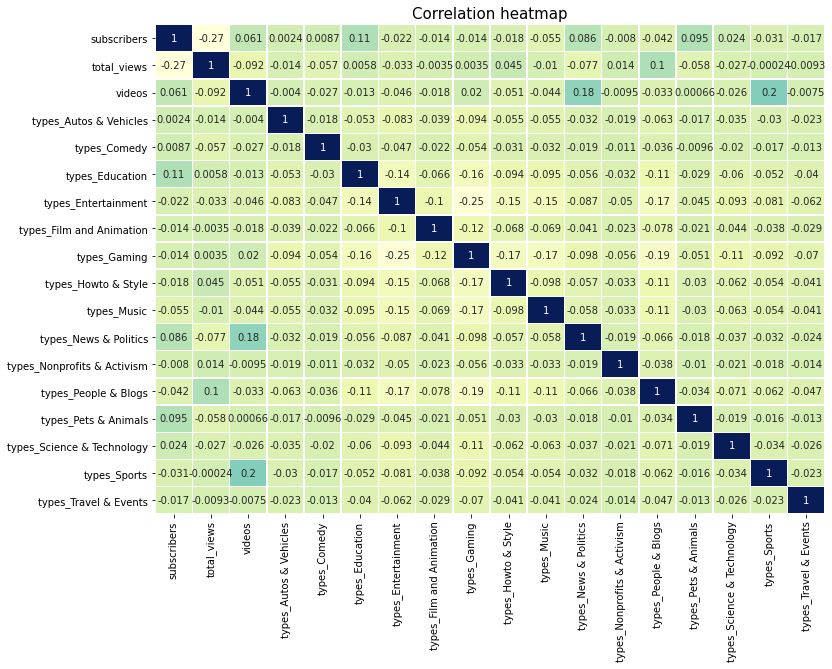

In [9]:
corr1=df1.corr()
plt.figure(figsize=(12,9))
g=sns.heatmap(corr1,annot=True, 
            linewidths=.5,
            cmap="YlGnBu",cbar=False);
g.set_title('Correlation heatmap', size=15);

- 1.2 posting date vs subscribers, total views, videos

In [10]:
# Numerical variables correlation:
df.corr()

,subscribers,total_views,videos
subscribers,1.000000,-0.270766,0.061107
total_views,-0.270766,1.000000,-0.091743
videos,0.061107,-0.091743,1.000000


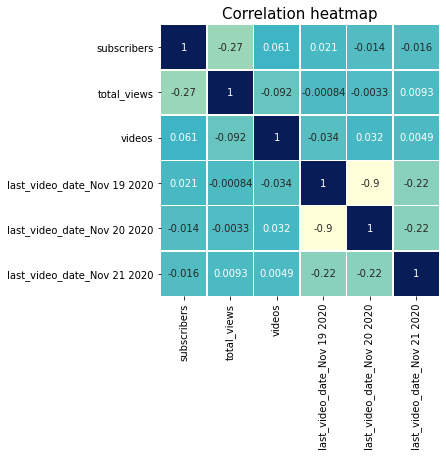

In [11]:
df2 = pd.get_dummies(df, columns=['last_video_date'])
corr2=df2.corr()
plt.figure(figsize=(5,5))
g=sns.heatmap(corr2,annot=True, 
            linewidths=.5,
            cmap="YlGnBu",cbar=False);
g.set_title('Correlation heatmap', size=15);

# mask = np.tril(pd.get_dummies(df.drop(columns={'titles', 'last_video_date'}, axis=1)).corr())

- 1.3 numerical variables

Text(0.5, 1.0, 'Correlation heatmap')

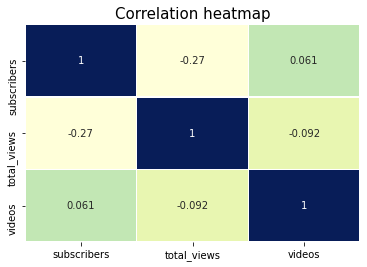

In [12]:
corr3=df.corr()
plt.figure(figsize=(6,4))
g=sns.heatmap(corr3,annot=True, 
            linewidths=.5,
            cmap="YlGnBu",cbar=False);
g.set_title('Correlation heatmap', size=15)

## 2. Variable analysis

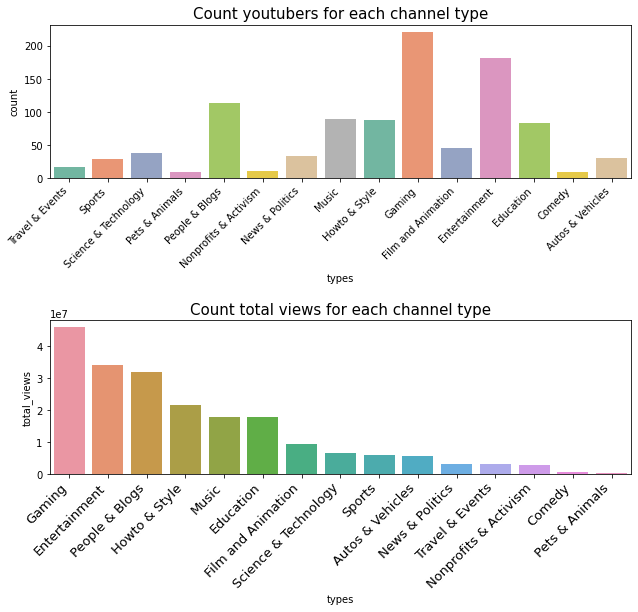

In [13]:
plt.figure(figsize=(9,15))
plt.subplot(4,1,1)

g=sns.countplot(df['types'].sort_values(ascending=False), palette=("Set2"))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
g.set_title('Count youtubers for each channel type', size=15);

plt.subplot(4,1,2)
total_view=df.groupby('types')['total_views'].sum().to_frame().reset_index().sort_values(by='total_views', ascending=False)
ax = sns.barplot('types', 'total_views', data=total_view)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', size=13);
ax.set_title('Count total views for each channel type', size=15);
plt.tight_layout()

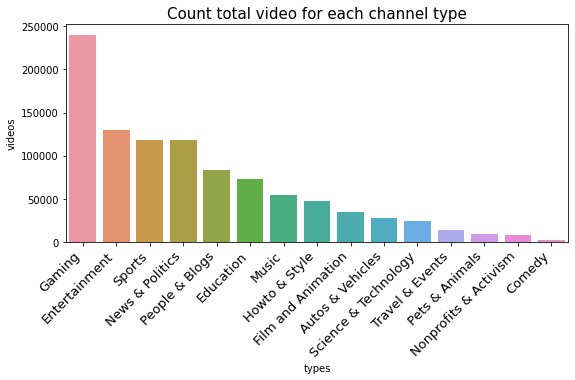

In [14]:
total_video=df.groupby('types')['videos'].sum().to_frame().reset_index().sort_values(by='videos', ascending=False)
plt.figure(figsize=(9,4))
ax2 = sns.barplot('types', 'videos', data=total_video)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right', size=13);
ax2.set_title('Count total video for each channel type', size=15);

In [15]:
total_video=df.groupby('types')['videos'].sum().to_frame().reset_index().sort_values(by='videos', ascending=False)

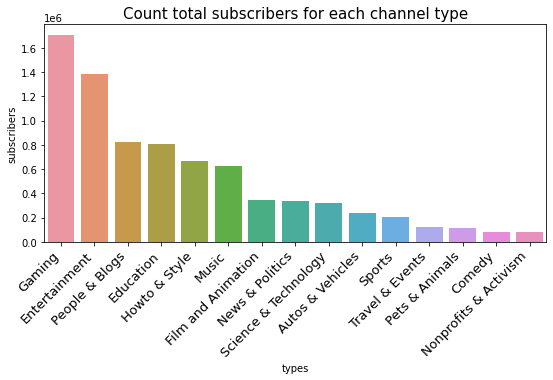

In [16]:
total_sub=df.groupby('types')['subscribers'].sum().to_frame().reset_index().sort_values(by='subscribers', ascending=False)
plt.figure(figsize=(9,4))
ax3 = sns.barplot('types', 'subscribers', data=total_sub)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right', size=13);
ax3.set_title('Count total subscribers for each channel type', size=15);

## Top 50 youtubers based on different variables


### 1. top channels

In [17]:
top_channels=df.sort_values(by='subscribers', ascending=False)[:30].reset_index(drop=True)

In [18]:
t=top_channels.groupby('types')['name'].count().sort_values(ascending=False)

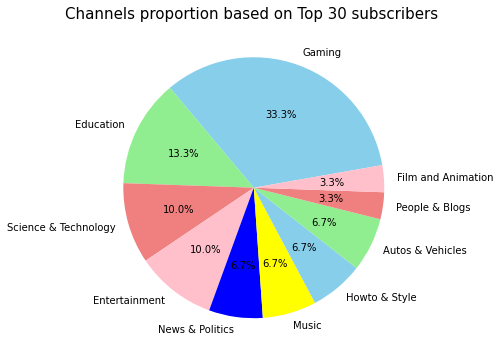

In [19]:
plt.figure(figsize=(6,6))
sizes = t.values
colors = ['skyblue', 'lightgreen', 'lightcoral', 'pink','blue', 'yellow']
plt.pie(sizes,               
        labels=t.index,      
        colors=colors,      
         autopct='%1.1f%%',  
        startangle=10
        )

# plt.axis('equal')
plt.title('Channels proportion based on Top 30 subscribers ', size=15)
plt.show()

### 2. top_views

In [20]:
top_channels=df.sort_values(by='total_views', ascending=False)[:30].reset_index(drop=True)
t=top_channels.groupby('types')['total_views'].count().sort_values(ascending=False)

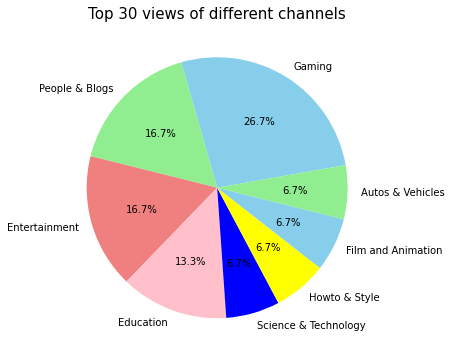

In [21]:
plt.figure(figsize=(6,6))
sizes = t.values
colors = ['skyblue', 'lightgreen', 'lightcoral', 'pink','blue', 'yellow']
plt.pie(sizes,               
        labels=t.index,      
        colors=colors,      
         autopct='%1.1f%%',  
        startangle=10
        )
# plt.axis('equal')
plt.title('Top 30 views of different channels', size=15)
plt.show()

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [23]:
model=df.drop(columns={'name', 'subscribers'}, axis=1)

In [24]:
model_dummy=pd.get_dummies(model)

In [25]:
scaler = preprocessing.StandardScaler().fit_transform(model_dummy)


In [26]:
y=df['subscribers']

In [27]:
X_train, X_test, y_train, y_test=train_test_split(scaler,y)

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
coe=lr.coef_
features=model_dummy.columns

In [31]:
a=pd.DataFrame(features,columns=['channel'])
a['values']=coe

In [32]:
a.sort_values(by='values')

,channel,values
7,types_Gaming,-2.495899e+16
5,types_Entertainment,-2.316025e+16
12,types_People & Blogs,-1.904422e+16
9,types_Music,-1.721488e+16
8,types_Howto & Style,-1.704123e+16
4,types_Education,-1.668589e+16
6,types_Film and Animation,-1.260129e+16
14,types_Science & Technology,-1.150115e+16
10,types_News & Politics,-1.074564e+16
2,types_Autos & Vehicles,-1.026145e+16


In [33]:
avg=df.groupby('types').describe()['total_views', 'mean'].to_frame().reset_index()
avg['subs_avg']=df.groupby('types').describe()['subscribers']['mean'].reset_index(drop=True)
avg['avg_videos']=df.groupby('types').describe()['videos', 'mean'].reset_index(drop=True)
avg.iloc[:,1:]=avg.iloc[:,1:].apply(lambda x: np.round(x, 1),raw=True)
avg.columns=['types','views','subs','video']


In [34]:
avg.sort_values(by='video', ascending=False).reset_index(drop=True)

,types,views,subs,video
0,Sports,206031.0,6982.4,4082.2
1,News & Politics,97272.7,10205.2,3568.6
2,Gaming,208126.5,7734.5,1086.8
3,Pets & Animals,46388.8,12865.6,1003.3
4,Autos & Vehicles,185936.5,7935.0,922.9
5,Education,211403.5,9600.5,865.4
6,Travel & Events,187911.7,7208.2,830.4
7,Film and Animation,202226.1,7552.8,763.4
8,Nonprofits & Activism,240763.6,7490.9,741.0
9,People & Blogs,282342.4,7279.5,736.8


In [35]:
avg.sort_values(by='views', ascending=False).reset_index(drop=True)

,types,views,subs,video
0,People & Blogs,282342.4,7279.5,736.8
1,Howto & Style,244056.8,7574.0,535.4
2,Nonprofits & Activism,240763.6,7490.9,741.0
3,Education,211403.5,9600.5,865.4
4,Gaming,208126.5,7734.5,1086.8
5,Sports,206031.0,6982.4,4082.2
6,Film and Animation,202226.1,7552.8,763.4
7,Music,197804.3,6998.8,604.1
8,Entertainment,188243.0,7636.2,718.8
9,Travel & Events,187911.7,7208.2,830.4


In [36]:
avg.sort_values(by='subs', ascending=False).reset_index(drop=True)

,types,views,subs,video
0,Pets & Animals,46388.8,12865.6,1003.3
1,News & Politics,97272.7,10205.2,3568.6
2,Education,211403.5,9600.5,865.4
3,Science & Technology,170718.4,8481.0,635.1
4,Comedy,56880.0,8300.0,254.9
5,Autos & Vehicles,185936.5,7935.0,922.9
6,Gaming,208126.5,7734.5,1086.8
7,Entertainment,188243.0,7636.2,718.8
8,Howto & Style,244056.8,7574.0,535.4
9,Film and Animation,202226.1,7552.8,763.4


## Individuals:

In [37]:
df=df.drop(columns={'last_video_date'})

In [38]:
video_youtubers=df.sort_values('videos', ascending=False).reset_index(drop=True)[:400][['name','videos']]

In [39]:
subs_youtubers=df.sort_values('subscribers', ascending=False).reset_index(drop=True)[:400][['name', 'subscribers']]

In [40]:
view_youtubers=df.sort_values('total_views', ascending=False).reset_index(drop=True)[:400][['name', 'total_views']]

In [41]:
pd.merge(pd.merge(video_youtubers,subs_youtubers,on='name', how='inner'),view_youtubers,on='name', how='inner')

,name,videos,subscribers,total_views
0,WLFITV,38761,12200,134000
1,SpeedGaming,18274,19000,119000
2,Eyewitness News WTVO WQRF,15494,15100,119000
3,#TeamGRF TV: Internet Television We Control!,7005,11700,172000
4,Evan Channel 2000,4840,12600,137000
5,Guides Gamepressure,3056,13400,169000
6,SidsTips,2270,14900,138000
7,Fantech0104,2247,12200,178000
8,Law Offices of Phillips &amp; Hunt,2019,16500,178000
9,Ian Sweeney,1938,17600,185000


### New dataset

In [42]:
import pandas as pd

In [43]:
pd.read_csv('total_res.csv')

,author,description,rating,length,views,posting_date
0,the. Amazing,My Patreon: https://www.patreon.com/theamazing,5.000000,787,705,2020-12-25
1,the. Amazing,My Patreon: https://www.patreon.com/theamazing,5.000000,888,547,2020-12-24
2,the. Amazing,Edited by Garrett,4.905882,142,498,2020-12-23
3,the. Amazing,Also a tutorial sort of\n\nMy Patreon: https:/...,4.951220,1180,1824,2020-12-22
4,the. Amazing,STLs are available on My Patreon: https://www....,4.972789,741,940,2020-12-15
...,...,...,...,...,...,...
2138,RNClassics,🚨🛎 Put On Notifications!🚨\n➡️ LATEST VIDEOS/ST...,5.000000,4266,125,2020-12-13
2139,Scratch 'N Tater,Playing $30 in tickets for Buttery Bingo.\n\nJ...,4.954546,763,1426,2020-12-26
2140,Scratch 'N Tater,Playing $125 in tickets for Christmas.\n\nJoin...,4.966667,1713,1817,2020-12-25
2141,Scratch 'N Tater,Playing $52 in tickets for Worthless Wednesday...,4.876923,812,1727,2020-12-24


## New data set

In [44]:
df=pd.read_csv('total_res.csv')
df2=pd.read_csv('channel_5000.csv')

In [45]:
df2.shape

(998, 6)

In [46]:
df.shape

(2143, 6)

In [47]:
df['author'].nunique()

216

In [48]:
df.isnull().sum()
df.fillna('unk')

,author,description,rating,length,views,posting_date
0,the. Amazing,My Patreon: https://www.patreon.com/theamazing,5.000000,787,705,2020-12-25
1,the. Amazing,My Patreon: https://www.patreon.com/theamazing,5.000000,888,547,2020-12-24
2,the. Amazing,Edited by Garrett,4.905882,142,498,2020-12-23
3,the. Amazing,Also a tutorial sort of\n\nMy Patreon: https:/...,4.951220,1180,1824,2020-12-22
4,the. Amazing,STLs are available on My Patreon: https://www....,4.972789,741,940,2020-12-15
...,...,...,...,...,...,...
2138,RNClassics,🚨🛎 Put On Notifications!🚨\n➡️ LATEST VIDEOS/ST...,5.000000,4266,125,2020-12-13
2139,Scratch 'N Tater,Playing $30 in tickets for Buttery Bingo.\n\nJ...,4.954546,763,1426,2020-12-26
2140,Scratch 'N Tater,Playing $125 in tickets for Christmas.\n\nJoin...,4.966667,1713,1817,2020-12-25
2141,Scratch 'N Tater,Playing $52 in tickets for Worthless Wednesday...,4.876923,812,1727,2020-12-24


In [49]:
temp=df.groupby('author')['views'].describe()['std'].to_frame().reset_index().sort_values(by='std',ascending=False)

In [50]:
temp

,author,std
150,Regetik,174230.588964
11,Ari & Rosie M,36960.875658
3,ANGEL4EVA,31498.767637
59,Gaming & Gears,24132.327559
15,Axtraa,17108.230803
...,...,...
199,Xp3erynce,9.345825
143,REVELLO608,8.033956
79,Jason Mc,7.947047
159,ScrewPac Que,4.148628


In [51]:
#remove extremes
temp=temp[1:]

(0.0, 100000.0)

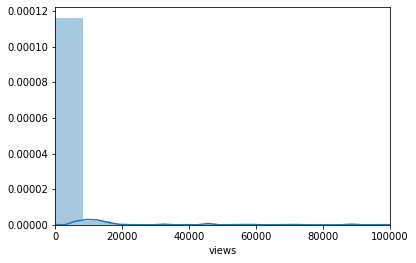

In [52]:
sns.distplot(df['views'])
plt.xlim(0,100000)

we have to remove extremes.

In [53]:
#2 std distance #95%
sd=temp['std'].std()

In [54]:
sd

4103.480744637063

In [55]:
temp=temp[temp['std']< sd*2]
temp.shape

(209, 2)

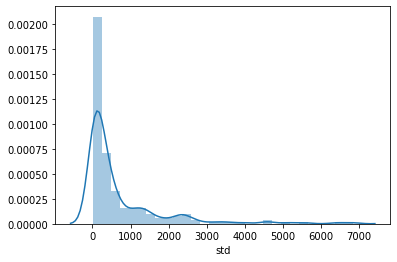

In [56]:
sns.distplot(temp['std'])

### compare description

In [57]:
df.head()

,author,description,rating,length,views,posting_date
0,the. Amazing,My Patreon: https://www.patreon.com/theamazing,5.000000,787,705,2020-12-25
1,the. Amazing,My Patreon: https://www.patreon.com/theamazing,5.000000,888,547,2020-12-24
2,the. Amazing,Edited by Garrett,4.905882,142,498,2020-12-23
3,the. Amazing,Also a tutorial sort of\n\nMy Patreon: https:/...,4.951220,1180,1824,2020-12-22
4,the. Amazing,STLs are available on My Patreon: https://www....,4.972789,741,940,2020-12-15


In [58]:
df.shape

(2143, 6)

In [59]:
df_without_extremes=pd.merge(df, temp, how='left', on='author').dropna()

In [60]:
df_without_extremes.shape

(1991, 7)

In [61]:
ds=df_without_extremes.groupby('author').first().reset_index()

In [62]:
ds.head()

,author,description,rating,length,views,posting_date,std
0,2Nasty TV,CREATOR: DellyBoWithTha4 \n\n🎬What’s happening...,5.000000,3808,12,2020-12-21,38.612174
1,A V,"After ""priming"" for the past 6 days, the newes...",5.000000,1551,1327,2020-12-26,936.592814
2,AGG TO,Sheffield United vs Everton 0-1 All Goals & Hi...,3.000000,570,168,2020-12-26,359.800191
3,APhantomChimera,Once Upon A December...\n\n\n_____\n\nI felt t...,5.000000,168,55,2020-12-20,145.823676
4,Abby Zachko Music,Put a little cover together with Biba Tippi :),4.911111,115,665,2020-12-20,4570.628949


In [63]:
a=[i for i in ds['description'] if 'http' in i]
ds_with_url=ds[ds['description'].isin(a)]
ds_without_url=ds[~ds['description'].isin(a)]

In [64]:
ds=df_without_extremes.groupby('author')['description'].first().to_frame().reset_index()

In [65]:
ds_without_url['author'][0]

'2Nasty TV'

- Finally, we got the list of our potential clients.

- Next step is to contact them and convert them to our clients

In [70]:

ds_without_url.sort_values(by='views')[['rating', 'length', 'views', 'posting_date', 'std']].reset_index(drop=True)[1:]

,rating,length,views,posting_date,std
1,5.000000,3808,12,2020-12-21,38.612174
2,5.000000,207,12,2020-12-26,3.840573
3,0.000000,2653,12,2020-12-26,20.034692
4,3.000000,641,13,2020-12-24,19.067424
5,0.000000,1403,14,2020-12-22,116.275583
...,...,...,...,...,...
74,4.953217,6034,1159,2020-12-23,184.861390
75,5.000000,996,1372,2020-12-24,3362.429328
76,4.753846,6936,2421,2020-12-17,1798.603251
77,4.824390,827,2462,2020-12-26,797.936679
